# Predicting Letters

In [20]:
#import libraries
import numpy as np
from seaborn import heatmap
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [21]:
# load and evaluate the saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model = load_model('model.h5')
# summarize model.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 32)         

#### requisites:
    - img size: 28x28
    - array
    - grayscale
    - 1/255

## 1. Predict characters

In [22]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [23]:
import glob

In [24]:
from PIL import Image
X_pred = []
y_true = []

for file in glob.glob("../dataset/test/characters/*"):
    img = Image.open(file).convert("L")
    img = img.resize((28,28))
    y_true.append(file.split("/")[-1].split('_')[0].upper())
    X_pred.append(np.array(img).reshape(1,28,28,1)/255)

In [25]:
y_true #There are the true classes of the letters I want to predict

['C', 'Q', 'A', 'Y', 'B', 'J', 'R', 'N', 'S']

In [26]:
X_pred = np.concatenate(X_pred, axis = 0)
X_pred.shape

(9, 28, 28, 1)

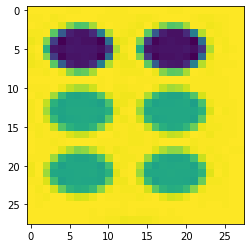

In [36]:
plt.imshow(X_pred[0])

In [37]:
#Now we are going to predict the class of each character using the model

In [38]:
y_pred = np.argmax(model.predict(X_pred),axis=1)

In [39]:
y_pred = [class_names[i] for i in y_pred]

In [40]:
y_pred

['D', 'Q', 'A', 'Y', 'B', 'J', 'R', 'N', 'S']

As we can see the model has predicted 8 out of 9 letters correctly, this is due to the accuracy value.

#### We now graph the correlation between the caracters and their true outputs

In [41]:
conf = confusion_matrix(y_true, y_pred)

<AxesSubplot:>

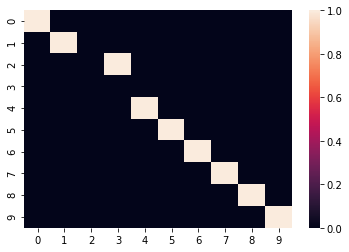

In [42]:
heatmap(conf)

In [43]:
{k:y_true.count(k) for k in set(y_true)}

{'R': 1, 'N': 1, 'B': 1, 'S': 1, 'Q': 1, 'C': 1, 'J': 1, 'Y': 1, 'A': 1}